## Health Project - Apple Data ##

In [16]:
import pandas as pd
import datetime as dt
import xml.etree.ElementTree as et
import os
import numpy as np
import seaborn as sns
import ipympl
import matplotlib.pyplot as plt

In [17]:
## <Directory> Add in the XML file directory

dir = ('<Directory>')

In [18]:
## Looping through the Tree->Roots->Elements->Attributes
tree = et.parse(dir) 
root = tree.getroot()
health_records = [x.attrib for x in root.iter('Record')]
health_records[0]

{'type': 'HKQuantityTypeIdentifierStepCount',
 'sourceName': 'Hubert’s iPhone',
 'sourceVersion': '9.1',
 'device': '<<HKDevice: 0x282f6c2d0>, name:iPhone, manufacturer:Apple, model:iPhone, hardware:iPhone7,2, software:9.1>',
 'unit': 'count',
 'creationDate': '2015-10-26 13:27:58 +1200',
 'startDate': '2015-10-26 13:01:35 +1200',
 'endDate': '2015-10-26 13:02:30 +1200',
 'value': '33'}

In [19]:
## Convert to DataFrame
data = pd.DataFrame(health_records)

In [20]:
## Data Transformations
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data['value'] = data['value'].fillna(1.0)
data.rename(columns={"endDate":"Date"},inplace=True)
for col in ['creationDate', 'startDate', 'Date']:
    data[col] = pd.to_datetime(data[col])


In [21]:
## Filtering for after 2020 - That was when I became more active!
filtered_date = data.loc[(data['Date']>= '2022-01-01')]

In [22]:
## Pivot up to get aggregations for types of measurements and their values by days
pivot_df = filtered_date.pivot_table(index='Date', columns='type', values='value')
df = pivot_df.resample('D').agg({'StepCount' : sum,
                                 'DistanceWalkingRunning' : sum,
                                 'WalkingSpeed' : np.mean,
                                 'WalkingStepLength' : np.mean})

In [23]:
## Magic commands
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

<AxesSubplot:xlabel='Date', ylabel='StepCount'>

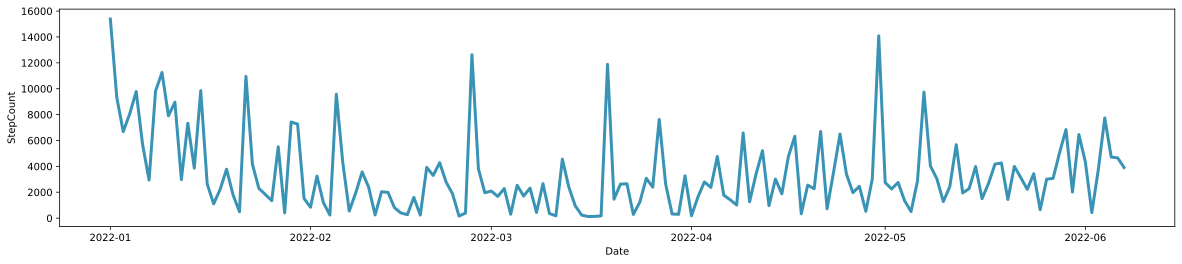

In [24]:
# Step Count
fig = plt.figure(figsize=(20,4)) 
cols = sns.set_palette("PuBuGn_d")
sns.lineplot(data=df['StepCount'],color=cols, linewidth=3)

<AxesSubplot:xlabel='Date', ylabel='WalkingStepLength'>

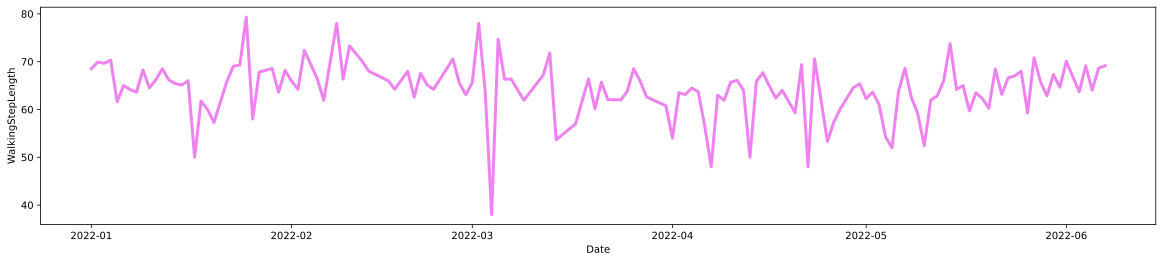

In [25]:
# Walking Step Length
fig = plt.figure(figsize=(20,4)) 
sns.lineplot(data=df['WalkingStepLength'], color = 'violet',palette='Pastel1_r', linewidth=3)

<AxesSubplot:xlabel='Date', ylabel='WalkingSpeed'>

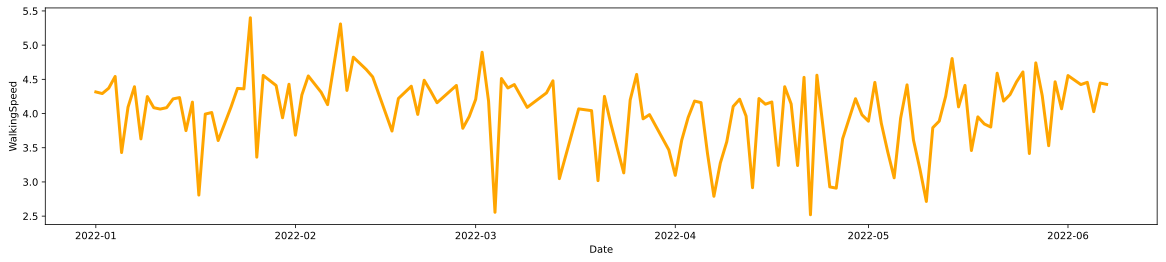

In [26]:
# Walking Speed
fig = plt.figure(figsize=(20,4)) 
sns.lineplot(data=df['WalkingSpeed'], color='orange', linewidth=3, palette="Accent_r")